# Pneumonia or Normal Lung Classification on X-rays

**Importing libraries**



In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import random
import os
import zipfile
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

**Load the data**

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category Pneumonia and Normal.


In [2]:
local_zip = r'C:\Users\ege\Desktop\Python\kaggle\pnoma\archive.zip'

In [3]:
zip_ref = zipfile.ZipFile(local_zip, 'r')

In [4]:
zip_ref.extractall(r'C:\Users\ege\Desktop\Python\kaggle\pnoma')
zip_ref.close()

In [5]:
base_dir = r'C:\Users\ege\Desktop\Python\kaggle\pnoma\chest_xray'

In [6]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
val_dir = os.path.join(base_dir , 'val')

In [7]:
train_normal_dir = os.path.join(train_dir ,'NORMAL')
train_pneumonia_dir = os.path.join(train_dir , 'PNEUMONIA')

In [8]:
test_normal_dir = os.path.join(test_dir ,'NORMAL')
test_pneumonia_dir = os.path.join(test_dir , 'PNEUMONIA')

In [9]:
val_normal_dir = os.path.join(val_dir ,'NORMAL')
val_pneumonia_dir = os.path.join(val_dir , 'PNEUMONIA')

**Printing name of pictures**


In [11]:
train_normal_file_names = os.listdir( train_normal_dir )
train_pneumonia_file_names = os.listdir( train_pneumonia_dir )

print(train_normal_file_names[:10],'\n')
print(train_pneumonia_file_names[:10])

['IM-0115-0001.jpeg', 'IM-0117-0001.jpeg', 'IM-0119-0001.jpeg', 'IM-0122-0001.jpeg', 'IM-0125-0001.jpeg', 'IM-0127-0001.jpeg', 'IM-0128-0001.jpeg', 'IM-0129-0001.jpeg', 'IM-0131-0001.jpeg', 'IM-0133-0001.jpeg'] 

['person1000_bacteria_2931.jpeg', 'person1000_virus_1681.jpeg', 'person1001_bacteria_2932.jpeg', 'person1002_bacteria_2933.jpeg', 'person1003_bacteria_2934.jpeg', 'person1003_virus_1685.jpeg', 'person1004_bacteria_2935.jpeg', 'person1004_virus_1686.jpeg', 'person1005_bacteria_2936.jpeg', 'person1005_virus_1688.jpeg']


**Number of pictures**


In [12]:
print('total training normal images :', len(os.listdir(train_normal_dir ) ))
print('total training pneuomia images :', len(os.listdir(train_pneumonia_dir ) ))
print("******")
print('total test normal images :', len(os.listdir(test_normal_dir ) ))
print('total test pneuomia images :', len(os.listdir(test_pneumonia_dir ) ))
print("******")
print('total val normal images :', len(os.listdir(val_normal_dir ) ))
print('total val pneuomia images :', len(os.listdir(val_pneumonia_dir) ))

total training normal images : 1341
total training pneuomia images : 3875
******
total test normal images : 234
total test pneuomia images : 390
******
total val normal images : 8
total val pneuomia images : 8


In [13]:
number_of_rows = 4
number_of_cols = 4

pic_index = 0

In [14]:
fig = plt.gcf()
fig.set_size_inches(number_of_rows*6, number_of_rows*6)

<Figure size 1728x1728 with 0 Axes>

In [15]:
pic_index+=8
next_normal_pic = [os.path.join(train_normal_dir, fname)  for fname in train_normal_file_names[ pic_index-8:pic_index] ]
next_pneuomia_pic = [os.path.join(train_pneumonia_dir, fname)  for fname in train_pneuomia_file_names[ pic_index-8:pic_index] ]

**Visualize the dataset** 


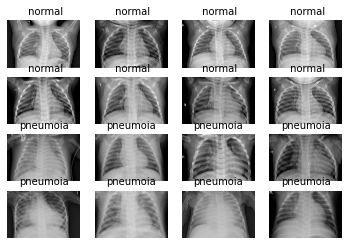

In [16]:
for img_num, img_path in enumerate(next_normal_pic + next_pneuomia_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(number_of_rows, number_of_cols, img_num + 1) 
  #fig, ax = plt.subplots(figsize=(18, 2))
  sp.axis('Off') 
  if   img_num  < 8:  
      plt.title(' normal' , size = 10)
  else:
     plt.title('pneumoia', size = 10)
  
  img = mpimg.imread(img_path)

  plt.imshow(img, cmap='gray' ,aspect='auto')
 

plt.show()


In [17]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback

**Build the CNN model**


In [18]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [19]:
with tf.device('/GPU:0'):
    model = tf.keras.models.Sequential([

        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300, 250, 1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2), 
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(256, (3,3), activation='relu'), 
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
        tf.keras.layers.MaxPooling2D(2,2),


        tf.keras.layers.Flatten(), 




        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  
    ])

In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy','mse'])

**Data Preprocessing**


Data generators that will read pictures in source folders, convert them to float32 tensors, and feed them to the network .Our generators will yield batches of 64 images of size 350x250 and their labels.

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. 
                                  ,  width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.1,
                                     rotation_range = 25,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=64,
                                                    class_mode='binary',
                                                    target_size=(300, 250),
                                                    color_mode =  'grayscale')     

test_generator =  test_datagen.flow_from_directory(test_dir,
                                                    batch_size=64,
                                                    class_mode  = 'binary',
                                                    target_size = (300, 250),
                                                    color_mode =  'grayscale')

val_generator = test_datagen.flow_from_directory(val_dir,
                                      batch_size=64,           
                                      target_size = (300, 250),
                                      class_mode = 'binary',
                                      color_mode =  'grayscale')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


**Training** 


In [23]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=5216 // 64,
                    epochs=14,verbose=2,
                     callbacks=[
                                    tf.keras.callbacks.ReduceLROnPlateau(
                                    monitor = 'val_loss',
                                    factor=0.1, 
                                    patience=7,
                                    min_delta = 0.0001 ,   
             
                                    mode = 'auto',
                                    verbose=1 )
                                        ]
                        
                   
                    )

Epoch 1/14
81/81 - 87s - loss: 0.5802 - accuracy: 0.7417 - mse: 0.1954 - val_loss: 0.8313 - val_accuracy: 0.5000 - val_mse: 0.3101 - lr: 0.0010
Epoch 2/14
81/81 - 60s - loss: 0.4387 - accuracy: 0.8053 - mse: 0.1405 - val_loss: 0.7035 - val_accuracy: 0.5625 - val_mse: 0.2466 - lr: 0.0010
Epoch 3/14
81/81 - 61s - loss: 0.3110 - accuracy: 0.8676 - mse: 0.0948 - val_loss: 0.5009 - val_accuracy: 0.7500 - val_mse: 0.1638 - lr: 0.0010
Epoch 4/14
81/81 - 60s - loss: 0.2366 - accuracy: 0.9070 - mse: 0.0696 - val_loss: 0.8584 - val_accuracy: 0.5625 - val_mse: 0.3062 - lr: 0.0010
Epoch 5/14
81/81 - 60s - loss: 0.1843 - accuracy: 0.9299 - mse: 0.0519 - val_loss: 0.2571 - val_accuracy: 0.8125 - val_mse: 0.0772 - lr: 0.0010
Epoch 6/14
81/81 - 60s - loss: 0.1780 - accuracy: 0.9371 - mse: 0.0496 - val_loss: 0.3746 - val_accuracy: 0.7500 - val_mse: 0.1302 - lr: 0.0010
Epoch 7/14
81/81 - 60s - loss: 0.1586 - accuracy: 0.9400 - mse: 0.0457 - val_loss: 0.5209 - val_accuracy: 0.7500 - val_mse: 0.1839 - lr:

**Evaluating Accuracy and Loss for the Model**

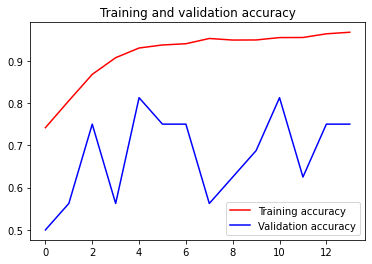

<Figure size 432x288 with 0 Axes>

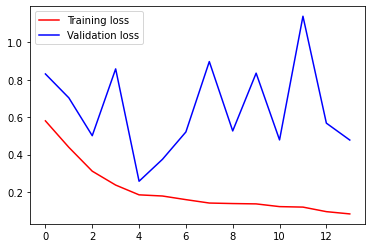

<Figure size 432x288 with 0 Axes>

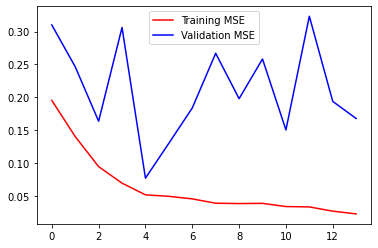

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
mse = history.history['mse']
val_mse = history.history['val_mse']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')


plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs ,mse , 'r' , label = "Training MSE")
plt.plot(epochs , val_mse, 'b' , label = 'Validation MSE')
plt.legend(loc=0)
plt.show()
